<a href="https://colab.research.google.com/github/descandon88/Analisis-de-Redes/blob/main/Trabajo_An%C3%A1lisis_de_Redes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Trabajo Final de Análisis de Redes 2021: RCAs, Proximidades, Complejidad Económica y Espacio de Productos
=====================================================================================

###Librerías

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import numpy as np
# Librerías para visualizacion
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
import re
import networkx as nx
from itertools import count
from itertools import combinations
from itertools import product
import statsmodels.api as sm
import urllib.request, json
!pip3 install geopandas
import geopandas
# -- set scientific notation to display numbers fully rather than exponential
pd.set_option('display.float_format', '{:.2f}'.format)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' 
import seaborn as sns
sns.set_style('whitegrid') # grids en dark background

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth',300)
print('librerías cargadas')

librerías cargadas


## **Se importa la base preparada desde Drive**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Importamos la base ya preparada desde drive
df = pd.read_csv("/content/drive/MyDrive/eci/base/df_updated.csv")
print('dataframe cargado')

dataframe cargado


## **Exploración del Data Frame**

#### Estructura de la base

In [ ]:
df.sample(n=6)
df

,year,country_code,country_name,product_code,product_name,export_value
3513085,2002,LBN,Lebanon,5109,"Yarn of wool or of fine animal hair, put up for retail sale",7475
464785,2017,ITA,Italy,903,Mate,165834
2742461,2003,TCA,Turks and Caicos Islands,3918,"Floor coverings of plastics, self-adhesive or not, in rolls or tiles; wall or ceiling coverings of plastics, in rolls of a width not less than 45cm",0
1856201,2008,BLR,Belarus,2846,"Compounds, inorganic or organic, of rare-earth metals; of yttrium or of scandium or of mixtures of these metals",0
5960492,2000,BEL,Belgium,8436,"Agricultural, horticultural, forestry, poultry-keeping, bee-keeping machinery; including germination plant fitted with mechanical or thermal equipment; poultry incubators and brooders",57854600
5475017,2015,AGO,Angola,7907,Zinc; articles n.e.s. in chapter 79,82319


,year,country_code,country_name,product_code,product_name,export_value
0,1995,ABW,Aruba,101,"Horses, asses, mules and hinnies; live",18008
1,1996,ABW,Aruba,101,"Horses, asses, mules and hinnies; live",0
2,1997,ABW,Aruba,101,"Horses, asses, mules and hinnies; live",0
3,1998,ABW,Aruba,101,"Horses, asses, mules and hinnies; live",0
4,1999,ABW,Aruba,101,"Horses, asses, mules and hinnies; live",14473
...,...,...,...,...,...,...
7373266,2016,BLM,Saint Barthélemy,9999,Commodities not specified according to kind,214449
7373267,2017,BLM,Saint Barthélemy,9999,Commodities not specified according to kind,457612
7373268,2018,BLM,Saint Barthélemy,9999,Commodities not specified according to kind,327454
7373269,2019,BLM,Saint Barthélemy,9999,Commodities not specified according to kind,253382


#### Agrego un leading zero al product_code de la base para cumplir con la nomenclatura del HS

In [ ]:
df['product_code']  = df['product_code'].apply(lambda x: '{0:0>4}'.format(x))


In [ ]:
#df.head()
df_name = df.drop(columns = ['year','country_code','country_name','export_value'])
#df_name = pd.concat([df['product_code'],df['product_name']]).unique()
#df_name = pd.DataFrame(df_name)
df_name.head()

,product_code,product_name
0,0101,"Horses, asses, mules and hinnies; live"
1,0101,"Horses, asses, mules and hinnies; live"
2,0101,"Horses, asses, mules and hinnies; live"
3,0101,"Horses, asses, mules and hinnies; live"
4,0101,"Horses, asses, mules and hinnies; live"


#### ¿Cuántos años existen en la base? 

In [ ]:
df['year'].unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020])

#### Cuántos productos contiene la base?

In [ ]:
df['product_name'].nunique()


1242

#### Ejercicio: ¿Cuáles fueron los productos de mayor exportación de Uruguay en el 2019 ? 


In [ ]:
# Creo un dataframe temporal (tmp_y) solo para Uruguay en el año 2019
df_tmp_uy = df[ (df['country_code']=='URY') & (df['year'] == 2019) ].copy()
# Creo un dataframe 'df_uy' que contenga la suma de las exportaciones por producto 
df_uy = df_tmp_uy.groupby(['product_code','product_name'],as_index=False)['export_value'].sum()
# Ordeno la base df_uy
df_uy.sort_values(by=['export_value'],ascending=False,inplace=True)
# show first 10 rows
df_uy[0:10]

,product_code,product_name,export_value
101,1201,Soya beans; whether or not broken,1359592960
530,4703,"Chemical wood pulp, soda or sulphate, other than dissolving grades",1304880128
7,0202,Meat of bovine animals; frozen,1181618176
503,4403,"Wood in the rough, whether or not stripped of bark or sapwood, or roughly squared",706908224
24,0402,Milk and cream; concentrated or containing added sugar or other sweetening matter,431324608
89,1006,Rice,331513728
98,1107,Malt; whether or not roasted,293003072
6,0201,Meat of bovine animals; fresh or chilled,267780832
1,0102,Bovine animals; live,180433152
1217,9999,Commodities not specified according to kind,169718416


#### ¿Cómo fué la exportación de productos "Meat of bovine animals; frozen" de Uruguay durante todos los años de la base? 

<Figure size 576x576 with 0 Axes>

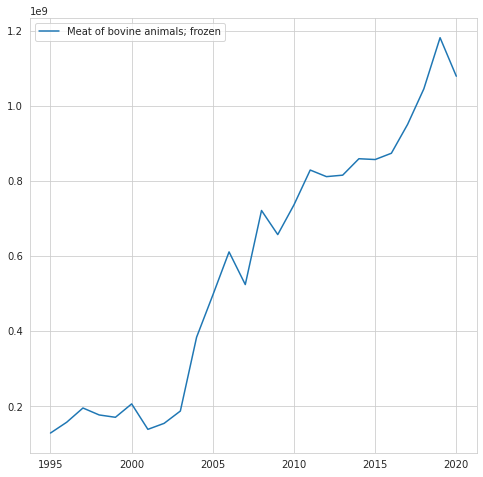

In [ ]:
daf_uy = df[ (df['country_code']=='URY')].copy()
#df3 = df2[df2['product_name']=='Cars']
df1_uy = daf_uy[daf_uy['product_code']=='0202']
plt.figure(figsize=(8,8))

plt.plot("year", "export_value", data=df1_uy, label = "Meat of bovine animals; frozen")

plt.legend()
plt.show()

#### **¿Cómo fueron los comportamientos de los Top 5 de productos de exportación de Uruguay durante todos los años de la base?**

<Figure size 864x864 with 0 Axes>

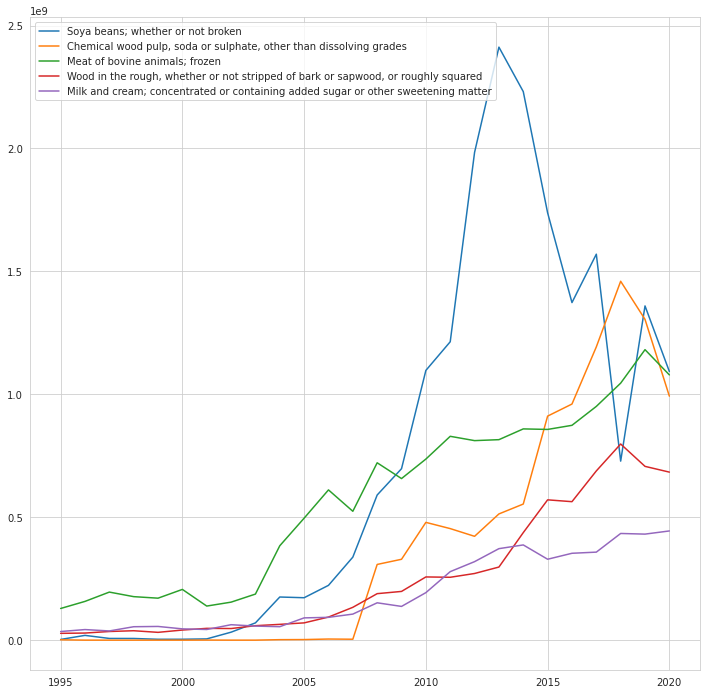

In [ ]:
daf_uy = df[ (df['country_code']=='URY')].copy()
#df3 = df2[df2['product_name']=='Cars']

df1_uy = daf_uy[daf_uy['product_code']=='1201']
df2_uy = daf_uy[daf_uy['product_code']=='4703']
df3_uy = daf_uy[daf_uy['product_code']=='0202']
df4_uy = daf_uy[daf_uy['product_code']=='4403']
df5_uy = daf_uy[daf_uy['product_code']=='0402']
#df5_uy = daf_uy[daf_uy['product_code']=='travel']
#df6_uy = daf_uy[daf_uy['product_code']=='1006'] --> refiere a Rice


plt.figure(figsize=(12,12))

plt.plot("year", "export_value", data=df1_uy, label="Soya beans; whether or not broken")
plt.plot("year", "export_value", data=df2_uy, label = "Chemical wood pulp, soda or sulphate, other than dissolving grades")
plt.plot("year", "export_value", data=df3_uy, label = "Meat of bovine animals; frozen")
#plt.plot("year", "export_value", data=df4_uy, label = "Travel and tourism	")
plt.plot("year", "export_value", data=df4_uy, label = "Wood in the rough, whether or not stripped of bark or sapwood, or roughly squared")
plt.plot("year", "export_value", data=df5_uy, label="Milk and cream; concentrated or containing added sugar or other sweetening matter")


plt.legend()
plt.show()


#### **¿y medicamentos ?**

<Figure size 864x864 with 0 Axes>

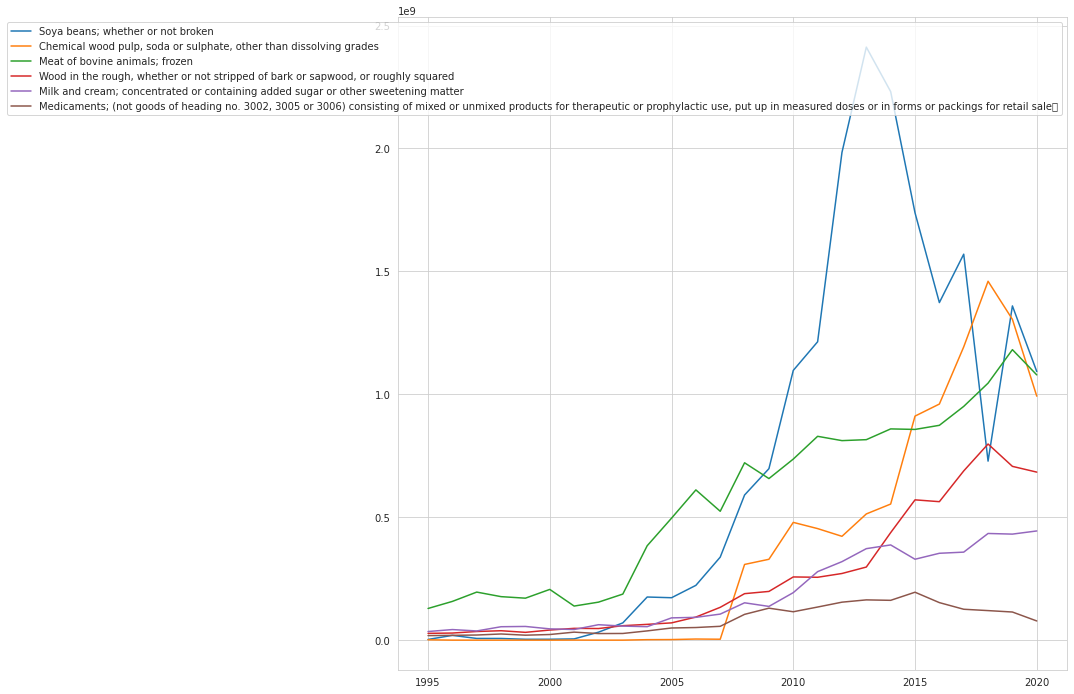

In [ ]:
daf_uy = df[ (df['country_code']=='URY')].copy()
#df3 = df2[df2['product_name']=='Cars']

df1_uy = daf_uy[daf_uy['product_code']=='1201']
df2_uy = daf_uy[daf_uy['product_code']=='4703']
df3_uy = daf_uy[daf_uy['product_code']=='0202']
df4_uy = daf_uy[daf_uy['product_code']=='4403']
df5_uy = daf_uy[daf_uy['product_code']=='0402']
df6_uy = daf_uy[daf_uy['product_code']=='3004']
#df7_uy = daf_uy[daf_uy['product_code']=='1006'] --> refiere a Rice


plt.figure(figsize=(12,12))

plt.plot("year", "export_value", data=df1_uy, label="Soya beans; whether or not broken")
plt.plot("year", "export_value", data=df2_uy, label = "Chemical wood pulp, soda or sulphate, other than dissolving grades")
plt.plot("year", "export_value", data=df3_uy, label = "Meat of bovine animals; frozen")
plt.plot("year", "export_value", data=df4_uy, label = "Wood in the rough, whether or not stripped of bark or sapwood, or roughly squared")
plt.plot("year", "export_value", data=df5_uy, label="Milk and cream; concentrated or containing added sugar or other sweetening matter")
plt.plot("year", "export_value", data=df6_uy, label = "Medicaments; (not goods of heading no. 3002, 3005 or 3006) consisting of mixed or unmixed products for therapeutic or prophylactic use, put up in measured doses or in forms or packings for retail sale	")



plt.legend()
plt.show()


##**Ventaja Comparativa Revelada (RCA)**

###¿En qué productos están especializados los países? Tomando como referencia a Hidalgo et al. (2007), se calcula la Ventaja Comparativa Revelada (RCA) de cada par país-producto. Es decir, ¿cuánto un país "sobreexporta" un producto en comparación con todos los demás países? 

###Técnicamente, este es el índice de ventaja comparativa de Balassa, calculado de la siguiente manera para el producto py el país c en el momento t:

##RCAcpt=Xcpt/XctXpt/Xt(1)

###donde Xcpt representa el valor total de las exportaciones del producto "p" del país "c" en el tiempo "t" entre todos los importadores. Un subíndice omitido indica una suma sobre la dimensión omitida, por ejemplo: Xt = ∑c, p, tXcpt.

### Un par producto-país con RCA> 1 significa que el producto está sobrerrepresentado en la canasta de exportación del país.

###Usamos el conjunto de datos comerciales original ("df") que se encuentra ya cargado:

In [ ]:
## Función para el cálculo de RCA

def calc_rca(data,pais_col,prod_col,anio_col,value_col):
    """
      La función que calcula la RCA
    
    """
    print('Creando las combinaciones de país-producto-tiempo')
    df_all = pd.DataFrame(list(product(data[anio_col].unique(), data[pais_col].unique(),data[prod_col].unique())))
    df_all.columns=[anio_col,pais_col,prod_col]
    print('Se procede a fusionar los datos')
    df_all = pd.merge(df_all,data[[anio_col,pais_col,prod_col,value_col]],how='left',on=[anio_col,pais_col,prod_col])
    df_all.loc[df_all[value_col].isnull(),value_col] = 0

    # En esta parte se calculan propiedades
    print('calculando')
    df_all['Xcpt'] = df_all[value_col]
    df_all['Xct'] = df_all.groupby([pais_col, anio_col])[value_col].transform(sum)
    df_all['Xpt'] = df_all.groupby([prod_col, anio_col])[value_col].transform(sum)
    df_all['Xt'] = df_all.groupby([anio_col])[value_col].transform('sum')

    df_all['RCAcpt'] = (df_all['Xcpt']/df_all['Xct'])/(df_all['Xpt']/df_all['Xt']) #--> ecuación de las ventaja comparativa revelada RCA
    
    ## 0 si el producto / país tiene 0 exportaciones
    df_all.loc[df_all['RCAcpt'].isnull(),'RCAcpt'] = 0 
    # drop the properties 
    df_all.drop(['Xcpt','Xct','Xpt','Xt'],axis=1,inplace=True,errors='ignore')

    return df_all



In [ ]:
df_rca = calc_rca(data=df,pais_col='country_name',prod_col='product_name',anio_col='year',value_col='export_value')

print('rca listo!!')

# Se muestran resultados
df_rca[0:10]

Creando las combinaciones de país-producto-tiempo
Se procede a fusionar los datos
calculando
rca listo!!


,year,country_name,product_name,export_value,RCAcpt
0,1995,Aruba,"Horses, asses, mules and hinnies; live",18008.00,0.13
1,1995,Aruba,Bovine animals; live,0.00,0.00
2,1995,Aruba,Swine; live,0.00,0.00
3,1995,Aruba,Sheep and goats; live,0.00,0.00
4,1995,Aruba,"Poultry; live, fowls of the species gallus domesticus, ducks, geese, turkeys and guinea fowls",0.00,0.00
5,1995,Aruba,"Animals, n.e.s. in chapter 01; live",2336.00,0.05
6,1995,Aruba,Meat of bovine animals; fresh or chilled,0.00,0.00
7,1995,Aruba,Meat of bovine animals; frozen,0.00,0.00
8,1995,Aruba,"Meat of swine; fresh, chilled or frozen",0.00,0.00
9,1995,Aruba,"Meat of sheep or goats; fresh, chilled or frozen",0.00,0.00


###**¿Qué productos se especializó Noruega, Uruguay y Nueva Zelanda en el 2019?** 

In [ ]:
# Noruega
print("\n Norway: \n")

df_rca[ (df_rca['year']==2019) & (df_rca['country_name']=='Norway')].sort_values(by=['RCAcpt'],ascending=False)[['product_name','RCAcpt','year']][0:5]

print("\n Uruguay:\n")

# Uruguay
df_rca[ (df_rca['year']==2019) & (df_rca['country_name']=='Uruguay')].sort_values(by=['RCAcpt'],ascending=False)[['product_name','RCAcpt','year']][0:10]

print("\n New Zealand:\n")

# Nueva Zelanda
df_rca[ (df_rca['year']==2019) & (df_rca['country_name']=='New Zealand')].sort_values(by=['RCAcpt'],ascending=False)[['product_name','RCAcpt','year']][0:10]


 Norway: 



,product_name,RCAcpt,year
7396127,Fish; fresh or chilled (excluding fish fillets and other fish meat of heading no. 0304),63.21,2019
7396534,"Residual lyes from the manufacture of wood pulp, whether or not concentrated, desugared or chemically treated, including lignin sulphonates, but excluding tall oil of heading no. 3803",43.55,2019
7396452,Carboxyamide-function compounds; amide-function compounds of carbonic acid,28.14,2019
7396130,"Fish; dried, salted or in brine, smoked fish, whether or not cooked before or during the smoking process, fish meal fit for human consumption",25.18,2019
7397247,"Vessels; other, including warships and lifeboats, other than rowing boats",19.65,2019



 Uruguay:



,product_name,RCAcpt,year
7465762,Malt; whether or not roasted,147.98,2019
7466249,Wool and fine or coarse animal hair; carded or combed (including combed wool in fragments),104.06,2019
7465672,"Meat of horses, asses, mules or hinnies; fresh, chilled or frozen",91.80,2019
7466172,"Wood in the rough, whether or not stripped of bark or sapwood, or roughly squared",88.74,2019
7465669,Meat of bovine animals; frozen,88.22,2019
7466199,"Chemical wood pulp, soda or sulphate, other than dissolving grades",75.82,2019
7466247,"Waste of wool or of fine or coarse animal hair, including yarn waste but excluding garnetted stock",72.41,2019
7465786,"Fats of bovine animals, sheep or goats; raw or rendered, whether or not pressed or solvent-extracted",51.05,2019
7465765,Soya beans; whether or not broken,48.38,2019
7466245,"Wool, not carded or combed",47.30,2019



 New Zealand:



,product_name,RCAcpt,year
7399845,"Meat of sheep or goats; fresh, chilled or frozen",155.94,2019
7400371,"Wood pulp, mechanical wood pulp",153.59,2019
7400237,"Casein, caseinates and other casein derivatives; casein glues",138.75,2019
7399860,Milk and cream; concentrated or containing added sugar or other sweetening matter,127.45,2019
7399875,"Ivory, tortoise-shell, whalebone and whalebone hair, horns, antlers, hooves, nails, claws and beaks unworked or simply prepared, not cut to shape; waste and powder of these products",117.01,2019
7399863,Butter and other fats and oils derived from milk,104.59,2019
7400346,"Wood in the rough, whether or not stripped of bark or sapwood, or roughly squared",68.26,2019
7399849,"Meat and edible meat offal, n.e.s. in chapter 2; fresh, chilled or frozen",68.15,2019
7399983,"Extracts and juices of meat, fish or crustaceans, molluscs or other aquatic invertebrates",56.10,2019
7399867,Honey; natural,55.36,2019


##**CALCULO DE PROXIMIDADES ENTRE PRODUCTOS**

###Teniendo los RCA para cada país, pasamos hacer el cálculo de proximidades entre productos. 
###Tomando como referencia el documento de Hidalgo (2007):

![](https://drive.google.com/uc?export=view&id=1X28TNOgSLwReetxgk569vcu26TANkm4V
)






### La medición de similitud entre productos i y j basado en la probabilidad condicional de tener RCA, que mide si un país es un exportador efectivo (RCA>1) de  un bien i o no (RCA<1). 
###Se crea el umbral Mcp que refiere a una nueva columna de tipo binaria donde asigna 0 cuando RCA<1 y 1 cuando RCA>1



In [ ]:
df_rca['Mcp'] = 0
df_rca.loc[df_rca['RCAcpt']>1,'Mcp'] = 1

In [ ]:
df_rca.sort_values(by=['year','RCAcpt'], ascending=False)

,year,country_name,product_name,export_value,RCAcpt,Mcp
7518739,2020,Anguilla,"Lead; plates, sheets, strip and foil, lead powders and flakes",2146256.00,20973.04,1
7568830,2020,Comoros,"Cloves; (whole fruit, cloves and stems)",17140862.00,16496.34,1
7717340,2020,French Polynesia,"Pearls; natural or cultured, whether or not worked or graded but not strung, mounted or set; ungraded pearls, natural or cultured, temporarily strung for convenience of transport",24010362.00,14899.72,1
7756330,2020,Tonga,"Coral and similar materials, unworked or simply prepared, shells of molluscs, crustaceans or echinoderms and cuttle-bone, not cut to shape powder and waste thereof",809310.00,11043.86,1
7710233,2020,Palau,Vessels and other floating structures; for breaking up,7225117.00,10304.04,1
...,...,...,...,...,...,...
300559,1995,Saint Barthélemy,"Sculptures and statuary; original, in any material",0.00,0.00,0
300560,1995,Saint Barthélemy,"Stamps, postage or revenue; stamp-postmarks, first-day covers, postal stationery (stamped paper) and like, used, or if unused not of current or new issue in the country to which they are destined",0.00,0.00,0
300561,1995,Saint Barthélemy,"Collections and collectors' pieces; of zoological, botanical, mineralogical, anatomical, historical, archaeological, palaeontological, ethnographic or numismatic interest",0.00,0.00,0
300562,1995,Saint Barthélemy,Antiques; of an age exceeding one hundred years,0.00,0.00,0


###A continuación, se procede a calcular la frecuencia con la que dos productos están presentes en los mismos países, utilizando el umbral de Mcp:

\begin{equation} 
C_{pp'} = \sum \limits_{c} M_{cp} M_{cp'}
\tag{1}
\end{equation}

###Para obtener un valor exacto de la proximidad del producto, se requiere corregir estos números en función de la medida en que los productos están presentes en general en los flujos comerciales entre países. Para ello, Hidalgo et al. (2007), calculan la proximidad del producto de la siguiente manera, definiéndola como el mínimo de dos probabilidades condicionales:

\begin{equation}
C_{ppt'}  = \min \left( \frac{C_{pp'}}{C_{p}},\frac{C_{pp'}}{C_{p'}} \right)
\tag{2}
\end{equation}

###Finalmente, la proximidad entre dos productos i y j se define como el mínimo de la probabilidad condicional de tener ventaja comparativa en uno de los dos, dado que se exporta el otro bien.Es decir,


![](https://drive.google.com/uc?export=view&id=1jzeSlcQbEqRZFXbRBIV78Jv89A8WcoSV
) 


In [ ]:
def calc_cppt(data,country_col,product_col):
    """
    Función para el cálculo de las co-ocurrencias en los países
    Retorna:
        Dataframe con valores de co-ocurrencias para cada par de producto
    """

    # Se crea combinaciones dentro del country_col (i.e. paises) por productos (i.e. products)
    dft = (data.groupby(country_col)[product_col].apply(lambda x: pd.DataFrame(list(combinations(x,2))))
            .reset_index(level=1, drop=True)
            .reset_index())
    dft.rename(columns={0:f'{product_col}_1'}, inplace=True)
    dft.rename(columns={1:f'{product_col}_2'}, inplace=True)

    # -- {product_col} 1 X {product_col} 2 == {product_col} 2 X {product_col} 1
    dft2 = dft.copy()
    dft2.rename(columns={f'{product_col}_1':f'{product_col}_2t'}, inplace=True)
    dft2.rename(columns={f'{product_col}_2':f'{product_col}_1'}, inplace=True)
    dft2.rename(columns={f'{product_col}_2t':f'{product_col}_2'}, inplace=True)
    # -- add second half
    dft3 = pd.concat([dft,dft2],axis=0,sort=False)

    # retiro de diagonales en caso de que estén presentes
    dft3 = dft3[ dft3[f'{product_col}_1'] != dft3[f'{product_col}_2'] ]

    # se calcula la cantindad N veces que los {product_col}s ocurren simultáneamente
    dft3['count'] = 1
    dft3 = dft3.groupby([f'{product_col}_1',f'{product_col}_2'],as_index=False)['count'].sum()
    dft3.rename(columns={f'count':f'Cpp'}, inplace=True)

    # Calculo de Ubicuidad
    df_ub = data.groupby(product_col,as_index=False)['Mcp'].sum()

    # merge del calculo de ubicuidad en la matriz de cpp 
    df_ub.rename(columns={f'{product_col}':f'{product_col}_1'}, inplace=True)
    dft3 = pd.merge(dft3,df_ub,how='left',on=f'{product_col}_1')

    df_ub.rename(columns={f'{product_col}_1':f'{product_col}_2'}, inplace=True)
    dft3 = pd.merge(dft3,df_ub,how='left',on=f'{product_col}_2')

    # Toma el min de probabilidades condicionales
    dft3['kpi'] = dft3['Cpp']/dft3['Mcp_x']
    dft3['kpj'] = dft3['Cpp']/dft3['Mcp_y']
    dft3['phi'] = dft3['kpi']
    dft3.loc[dft3['kpj']<dft3['kpi'],'phi'] = dft3['kpj']
    
    return dft3



In [ ]:

# Filtro la base para el año 2019
dft = df_rca[df_rca['year']==2019].copy()

# Se mantienen las combinaciones de país-producto donde Mcp == 1 ( RCAcp> 1)
dft = dft[dft['Mcp']==1]

# Se calcula cpp con la función df_cppt
df_cppt = calc_cppt(dft,country_col='country_name',product_col='product_name')

print('dataframe de productos co-ocurrentes y aproximados se encuentra listo')

dataframe de productos co-ocurrentes y aproximados se encuentra listo


####Productos que co-ocurren más amenudo

In [ ]:

## Se ordena el dataframe de acuerdo a los valores de Cpp
df_cppt.sort_values(by=['Cpp'],ascending=False)[0:10]

,product_name_1,product_name_2,Cpp,Mcp_x,Mcp_y,kpi,kpj,phi
53711,Aluminium; waste and scrap,Copper; waste and scrap,81,108,112,0.75,0.72,0.72
313981,Copper; waste and scrap,Aluminium; waste and scrap,81,112,108,0.72,0.75,0.72
53797,Aluminium; waste and scrap,Ferrous waste and scrap; remelting scrap ingots of iron or steel,78,108,104,0.72,0.75,0.72
413369,Ferrous waste and scrap; remelting scrap ingots of iron or steel,Aluminium; waste and scrap,78,104,108,0.75,0.72,0.72
314292,Copper; waste and scrap,Ferrous waste and scrap; remelting scrap ingots of iron or steel,74,112,104,0.66,0.71,0.66
413595,Ferrous waste and scrap; remelting scrap ingots of iron or steel,Copper; waste and scrap,74,104,112,0.71,0.66,0.66
315072,Copper; waste and scrap,"Waste, parings and scrap, of plastics",55,112,76,0.49,0.72,0.49
1316427,"Waste, parings and scrap, of plastics",Copper; waste and scrap,55,76,112,0.72,0.49,0.49
414460,Ferrous waste and scrap; remelting scrap ingots of iron or steel,"Waste, parings and scrap, of plastics",51,104,76,0.49,0.67,0.49
314731,Copper; waste and scrap,"Plastic articles for the conveyance or packing of goods; stoppers, lids, caps and other closures of plastics",51,112,65,0.46,0.78,0.46


### Los productos más próximos

In [ ]:
## Se ordena el dataframe de acuerdo a los valores de phi que refiere al min de probabilidades condicionales

df_cppt.sort_values(by=['phi'],ascending=False)[0:10]

,product_name_1,product_name_2,Cpp,Mcp_x,Mcp_y,kpi,kpj,phi
134171,"Blouses, shirts and shirt-blouses; women's or girls', knitted or crocheted","Suits, ensembles, jackets, dresses, skirts, divided skirts, trousers, bib and brace overalls, breeches and shorts (not swimwear), women's or girls', knitted or crocheted",41,48,46,0.85,0.89,0.85
1125956,"Suits, ensembles, jackets, dresses, skirts, divided skirts, trousers, bib and brace overalls, breeches and shorts (not swimwear), women's or girls', knitted or crocheted","Blouses, shirts and shirt-blouses; women's or girls', knitted or crocheted",41,46,48,0.89,0.85,0.85
1128003,"Suits, ensembles, jackets, dresses, skirts, divided skirts, trousers, bib and brace overalls, breeches and shorts (other than swimwear); women's or girls' (not knitted or crocheted)","Suits, ensembles, jackets, dresses, skirts, divided skirts, trousers, bib and brace overalls, breeches and shorts (not swimwear), women's or girls', knitted or crocheted",40,47,46,0.85,0.87,0.85
1126800,"Suits, ensembles, jackets, dresses, skirts, divided skirts, trousers, bib and brace overalls, breeches and shorts (not swimwear), women's or girls', knitted or crocheted","Suits, ensembles, jackets, dresses, skirts, divided skirts, trousers, bib and brace overalls, breeches and shorts (other than swimwear); women's or girls' (not knitted or crocheted)",40,46,47,0.87,0.85,0.85
1125546,"Suits, ensembles, jackets, blazers, trousers, bib and brace overalls, breeches, shorts (not swimwear); men's or boys', knitted or crocheted","Shirts; men's or boys', knitted or crocheted",38,45,44,0.84,0.86,0.84
1058851,"Shirts; men's or boys', knitted or crocheted","Suits, ensembles, jackets, blazers, trousers, bib and brace overalls, breeches, shorts (not swimwear); men's or boys', knitted or crocheted",38,44,45,0.86,0.84,0.84
1127153,"Suits, ensembles, jackets, dresses, skirts, divided skirts, trousers, bib and brace overalls, breeches and shorts (other than swimwear); women's or girls' (not knitted or crocheted)","Blouses, shirts and shirt-blouses; women's or girls', knitted or crocheted",39,47,48,0.83,0.81,0.81
134172,"Blouses, shirts and shirt-blouses; women's or girls', knitted or crocheted","Suits, ensembles, jackets, dresses, skirts, divided skirts, trousers, bib and brace overalls, breeches and shorts (other than swimwear); women's or girls' (not knitted or crocheted)",39,48,47,0.81,0.83,0.81
111260,Barley,Wheat and meslin,17,21,20,0.81,0.85,0.81
1327724,Wheat and meslin,Barley,17,20,21,0.85,0.81,0.81


###¿Qué producto está más relacionado al producto:"Meat of horses, asses, mules or hinnies; fresh, chilled or frozen"

In [ ]:
PRODUCT = 'Meat of horses, asses, mules or hinnies; fresh, chilled or frozen'
# Selecciona solo el producto
dft = df_cppt[df_cppt['product_name_1']==PRODUCT].copy()
# ordena de mayor a menos la col phi
dft.sort_values(by=['phi'],ascending=False,inplace=True)
# demuestra solo la primera fila
dft[0:1]

,product_name_1,product_name_2,Cpp,Mcp_x,Mcp_y,kpi,kpj,phi
731681,"Meat of horses, asses, mules or hinnies; fresh, chilled or frozen",Rape or colza seeds; whether or not broken,12,24,22,0.50,0.55,0.50


##**Espacio de Productos**

## The Product Space Conditions the Development of Nations (C. A. HIDALGO, B.KLINGERA.-L. BARABÁSIAND R. HAUSMANN)

### Para la construcción del gráfico del Espacio de Productos, la matriz de proximidad se simplifica, extrayendo aquellas conexiones más importantes y que permiten mantener todos los nodos del grafo conectados, utilizando como en Hidalgo et al. (2007) un algoritmo de MaximumSpanningTree, y agregando a este las principales n conexiones adicionales, donde n es el número de nodos (productos).

![](https://drive.google.com/uc?export=view&id=1YuGs1Y2oNIm9nTa8W1hRtdPXKuTlZ_qZ
)




**Cada nodo es un producto:**

Para posicionarlos en el espacio del producto, Hidalgo et al. (2007) utilizaron un algoritmo MaximumSpanningTree (que coloca los nodos de tal manera que haya la menor cantidad posible de edges cruzados, utilizando simulaciones físicas con algoritmos dirigidos por la fuerza), seguido de la elaboración a mano del resultado para separar visualmente distintos ' agrupaciones de productos.

**Tamaño de los nodos:**

El tamaño en el espacio del producto representa el $ total en el comercio mundial, pero también se pueden usar otros atributos de los nodos (por ejemplo, si los nodos son industrias, el tamaño podría ser el empleo total).

**Color de los nodos**

En el espacio de productos, el color del nodo representa los principales grupos de productos (por ejemplo, agricultura, productos químicos) siguiendo la clasificación de Leamer.

In [ ]:
!pip install --no-deps --force-reinstall fa2 python-louvain

  Using cached fa2-0.3.5-cp37-cp37m-linux_x86_64.whl
  Using cached python_louvain-0.15-py3-none-any.whl
  Attempting uninstall: python-louvain
    Found existing installation: python-louvain 0.15
    Uninstalling python-louvain-0.15:
      Successfully uninstalled python-louvain-0.15
  Attempting uninstall: fa2
    Found existing installation: fa2 0.3.5
    Uninstalling fa2-0.3.5:
      Successfully uninstalled fa2-0.3.5


In [ ]:
# paquetes básicos
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Se carga una base preparada con los productos que co-ocurren junto con su aproximidad phi
print("cargamos las bases preparadas sobre proximidades entre códigos de productos")
proxdf = pd.read_csv("/content/drive/MyDrive/eci/base/df_prox.csv")
proxdf_nom = pd.read_csv("/content/drive/MyDrive/eci/base/df_tipo_pro.csv",dtype='str')
## Importamos la base ya preparada desde drive
print('dataframes cargados')
proxdf.head()
#proxdf.sample(n=10)

cargamos las bases preparadas sobre proximidades entre códigos de productos
dataframes cargados


,commoditycode_1,commoditycode_2,proximity
0,101,101,0.00
1,101,102,0.28
2,101,103,0.35
3,101,104,0.26
4,101,105,0.30


###Se examina  la distribución de proximidad entre productos

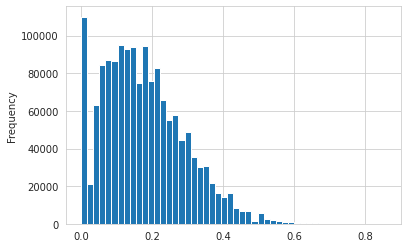

In [ ]:
proxdf.proximity.plot.hist(bins=50)

###Hacemos un print de la base proximidades incluyendo nombres de cateogría de productos
####Los nombres que se asignan esta vez, refieren a nombres cortos dentro del estándar HS. Esto facilitará el tamaño y manipulación del dataframe para el plot de espacio de productos que realizaré en las próximas líneas de código.

In [ ]:
proxdf_nom = proxdf_nom.rename(columns={'product_id':'product_code'})
#proxdf_nom['product_code']  = proxdf_nom['product_code'].apply(lambda x: '{0:0>4}'.format(x))
#proxdf_nom = pd.merge(proxdf_nom,df_name, on='product_code')
proxdf.commoditycode_1.nunique()
proxdf_nom.head()

1240

,product_code,hs_product_code,hs_product_name_short_en
0,0,0,Textiles
1,1,1,Agriculture
2,2,2,Stone
3,3,3,Minerals
4,4,4,Metals


In [ ]:
proxdf_nom.hs_product_code.nunique(),proxdf.commoditycode_1.nunique()


(6396, 1240)

In [ ]:
proxdf_nom['product_code']=proxdf_nom['product_code'].apply(lambda x: '{0:0>5}'.format(x))
proxdf_nom['hs_product_code']=proxdf_nom['hs_product_code'].apply(lambda x: '{0:0>5}'.format(x))
proxdf['commoditycode_1']=proxdf['commoditycode_1'].apply(lambda x: '{0:0>5}'.format(x))
proxdf['commoditycode_2']=proxdf['commoditycode_2'].apply(lambda x: '{0:0>5}'.format(x))
#nodedf = pd.merge(proxdf)


In [ ]:
### me quedo solamente con el HS code y el HS short name para el plot del espacio de producto
nodedf = proxdf_nom[proxdf_nom.hs_product_code.isin(proxdf.commoditycode_1)][['hs_product_code','hs_product_name_short_en']].sort_values('hs_product_code').reset_index(drop=True).copy()
nodedf.head()

,hs_product_code,hs_product_name_short_en
0,00101,Horses
1,00102,Bovine
2,00103,Swine
3,00104,Sheep
4,00105,Fowl


### Matriz de proximidad sin procesar

In [ ]:
proxmat = proxdf.pivot(index='commoditycode_1', columns='commoditycode_2',values='proximity').to_numpy()
proxmat.shape

(1240, 1240)

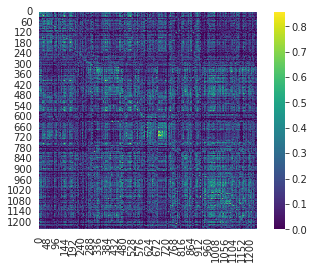

In [ ]:

sns.heatmap(proxmat,cmap='viridis',square=True)

**Gráfico de Proximidades** 

In [ ]:
## Con la matriz de proximidades (dataframe) procedemos a convertirlo a un objeto de networkx.
fullgraph = nx.from_pandas_edgelist(proxdf,source='commoditycode_1',target='commoditycode_2',edge_attr=True)
fullgraph.number_of_nodes(),fullgraph.number_of_edges()

(1240, 769420)

### Podemos aprovechar el paquete Networkx para la implementación de spanning tree con la base de proximidades

In [ ]:
mst = nx.maximum_spanning_tree(fullgraph,weight='proximity')
mst.number_of_edges()

1239

In [ ]:
prox_graph = mst.copy()
prox_graph.add_edges_from([(u,v,d) for u,v,d in fullgraph.edges(data=True) if d['proximity']>0.55]) ### se utiliza el valor de 0.55 por el artículo del 2007.
prox_graph.number_of_edges()

3107

In [ ]:
nx.density(prox_graph)

0.004044624957692208

###Visualización del esqueleto de la red

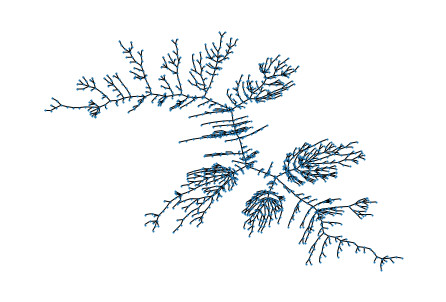

In [ ]:
position = nx.kamada_kawai_layout(mst)
nx.draw(mst,pos=position,node_size=1)

A continuación utilizaremos el algoritmo ForceAtlas2  para gráficos diseñados (dirigidos) por fuerzas. Ver: https://github.com/bhargavchippada/forceatlas2

In [ ]:
from fa2 import ForceAtlas2
### la variable pos2 adquirirá las posiciones x,y de los productos sobre el espacio. 
pos2 = ForceAtlas2(outboundAttractionDistribution=True).forceatlas2_networkx_layout(G=prox_graph, pos=position,iterations=500)

100%|██████████| 500/500 [00:06<00:00, 77.93it/s]

BarnesHut Approximation  took  3.71  seconds
Repulsion forces  took  2.23  seconds
Gravitational forces  took  0.03  seconds
Attraction forces  took  0.04  seconds
AdjustSpeedAndApplyForces step  took  0.14  seconds


<Figure size 1008x576 with 0 Axes>

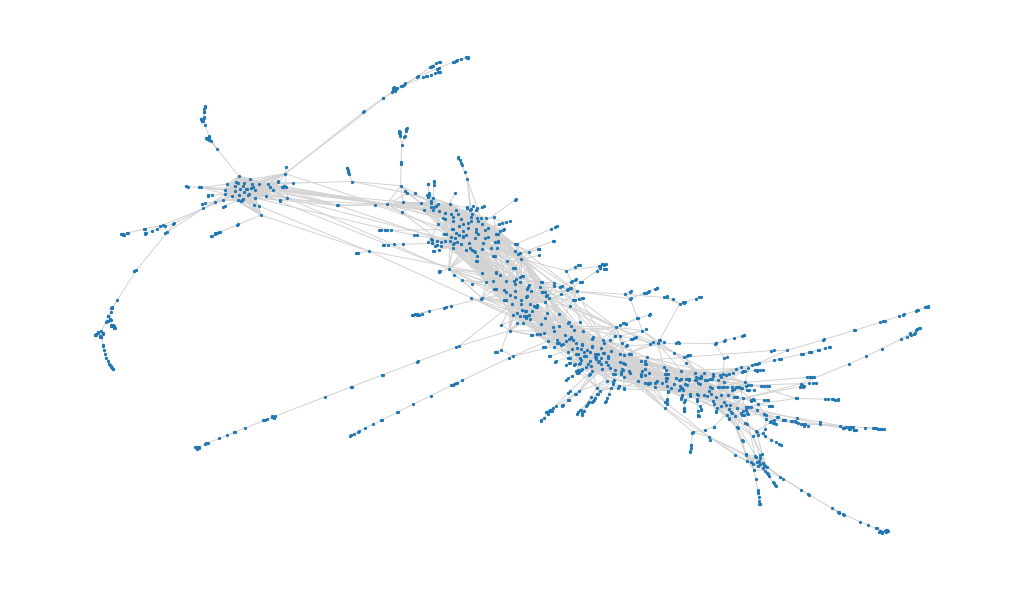

In [ ]:
plt.figure(figsize=(14,8))
nx.draw(prox_graph,pos=pos2,node_size=5,edge_color='lightgrey')

In [ ]:
posdf =pd.DataFrame.from_dict(pos2, orient='index',columns=['x','y'])
posdf['hs_product_code'] = posdf.index
posdf['hs_product_code']=posdf['hs_product_code'].apply(lambda x: '{0:0>5}'.format(x))


In [ ]:
posdf.head()

,x,y,hs_product_code
00101,525.65,168.66,00101
00102,-343.20,738.31,00102
00103,510.31,-182.98,00103
00104,-660.34,2057.92,00104
00105,-189.13,203.90,00105


In [ ]:
nodedf = nodedf.merge( posdf, how='left', on='hs_product_code').copy()
nodedf.head()

,hs_product_code,hs_product_name_short_en,x,y
0,00101,Horses,525.65,168.66
1,00102,Bovine,-343.20,738.31
2,00103,Swine,510.31,-182.98
3,00104,Sheep,-660.34,2057.92
4,00105,Fowl,-189.13,203.90


###Detección de comunidades

In [ ]:
import community as community_louvain

### utilizamos el paquete community_lovain para la detección de comunidades dentro de la lista de productos
partition = community_louvain.best_partition(prox_graph,weight='proximity',resolution=1,random_state=42)
max(partition.values()) + 1

38

In [ ]:
pardf =pd.DataFrame.from_dict(partition, orient='index',columns=['community_id'])
pardf['hs_product_code'] = posdf.index
pardf['hs_product_code']=pardf['hs_product_code'].apply(lambda x: '{0:0>5}'.format(x))

pardf.head()

,community_id,hs_product_code
00101,0,00101
00102,1,00102
00103,0,00103
00104,2,00104
00105,3,00105


In [ ]:
nodedf = nodedf.merge( pardf, how='left', on='hs_product_code')
nodedf.head()


,hs_product_code,hs_product_name_short_en,x,y,community_id
0,00101,Horses,525.65,168.66,0
1,00102,Bovine,-343.20,738.31,1
2,00103,Swine,510.31,-182.98,0
3,00104,Sheep,-660.34,2057.92,2
4,00105,Fowl,-189.13,203.90,3


Calculamos el tamaño de cada comunidad

In [ ]:
nodedf.community_id.value_counts()

15    194
10    151
1     143
3     112
16     72
13     69
6      60
0      56
2      43
8      31
12     29
5      23
21     20
9      20
29     19
4      17
32     16
11     14
19     14
31     13
26     12
36     12
7      11
23     11
17     10
24      9
18      6
14      6
22      6
25      6
28      5
33      5
34      5
37      5
27      4
30      4
35      4
20      3
Name: community_id, dtype: int64

Para cada comunidad se puede revisar qué productos son los que lo componen.

Por ejemplo para la comunidad 4, los productos que lo componen son un cluster de semillas, cereales,avenas, cebada, entre otros.

In [ ]:
nodedf.query('community_id == 4').sample(15)

,hs_product_code,hs_product_name_short_en,x,y,community_id
186,02207,Ethyl alcohol > 80%,337.31,387.95,4
88,01003,Barley,306.38,398.11,4
817,07207,Semifinished products of iron or nonalloy steel,205.20,419.83,4
107,01205,Rape or colza seeds,304.14,412.43,4
136,01514,"Rapeseed, colza or mustard oil,",147.02,370.53,4
147,01603,Extracts and juices of meat or fish,335.44,431.79,4
439,03820,Antifreezing preparation,189.21,405.96,4
411,03605,Matches,222.89,269.03,4
86,01001,Wheat and meslin,293.78,367.86,4
89,01004,Oats,309.76,417.85,4


Dada las conformación de comunidades en nuestra base, podemos volver a realizar una heatmap matrix para apreciar de mejor manera los clusters de productos identificados.

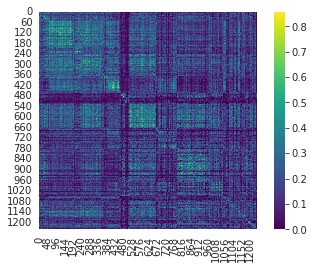

In [ ]:
cluster_products = np.argsort(nodedf.community_id)
proxmat_2 = proxmat[:,cluster_products][cluster_products]
sns.heatmap(proxmat_2,cmap='viridis',square=True)

### Dado que tenemos comunidades asignadas acorde a la proximidades de productos, podemos mostrar su ubicación sobre la red que diseñamos anteriormente.

In [ ]:
from matplotlib import colors
# Se utiliza el gist_rainbow colormap
cm = plt.get_cmap('gist_rainbow')
# Asignamos un color para cada community_id ,
arr_color = cm([x/nodedf.community_id.nunique() for x in nodedf.community_id])
# Se convierte el rgba array en un hex string y se lo guarda dentro del dataframe nodedf
nodedf['color'] = np.apply_along_axis(colors.to_hex, 1, arr_color)

nodedf.sample(5)

,hs_product_code,hs_product_name_short_en,x,y,community_id,color
1103,08603,Self-propelled railway coaches,220.76,-541.44,10,#bdff00
353,02936,Vitamins,897.40,-663.53,15,#05ff00
1121,08712,Bicycles,-725.58,-591.94,12,#77ff00
166,02002,"Tomatoes, prepared or preserved",59.42,-952.01,23,#00e6ff
208,02508,Clays,-676.09,2062.34,2,#ff1d00


<Figure size 1008x720 with 0 Axes>

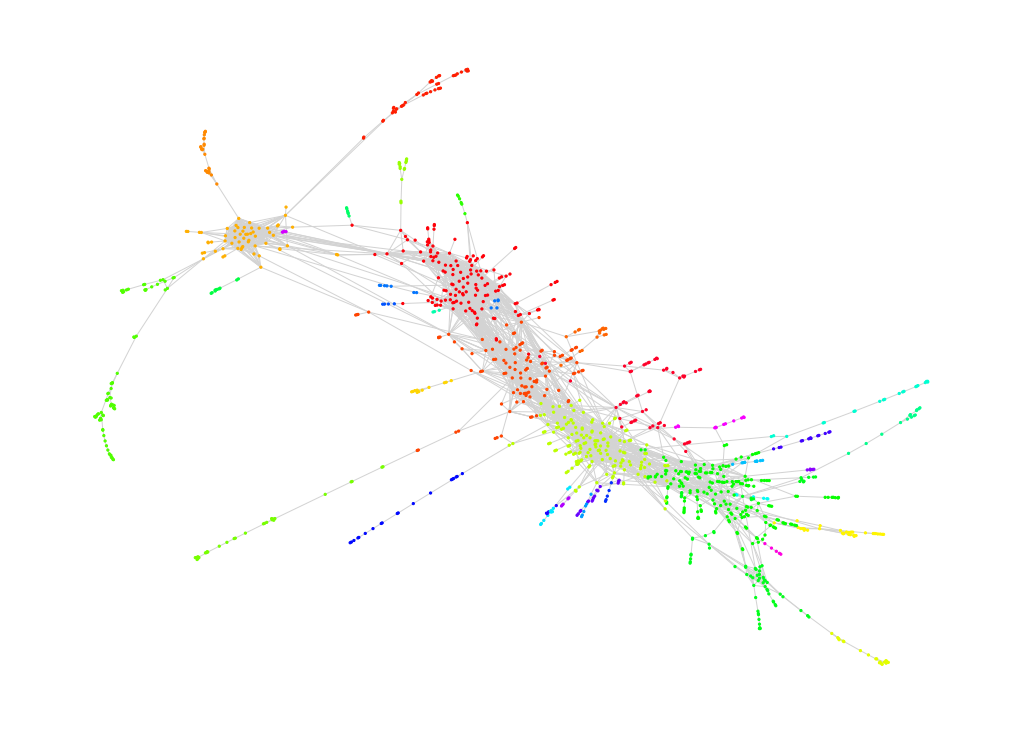

In [ ]:
plt.figure(figsize=(14,10))
nx.draw(prox_graph ,pos=pos2,node_size=5,node_color=nodedf.color,edge_color='lightgrey')

##**Calculo de Complexidad Económica**
### Instalamos el paquete de python para el cálculo de índice de complejidad económica desarrollado por Shreyas Gadgin Matha "https://github.com/cid-harvard/py-ecomplexity"


In [ ]:
!pip install ecomplexity
print('installed py-ecomplexity')

  Created wheel for ecomplexity: filename=ecomplexity-0.5.2-py3-none-any.whl size=11283 sha256=06c3a75131719369ded1a5316f5817b73d2486a60636f6a856aec68a0bb38b2d
  Stored in directory: /root/.cache/pip/wheels/f5/37/7a/4d27a85fcc38e0d9035088ab2a2626080c069140034db3aade
Successfully built ecomplexity
installed py-ecomplexity


In [ ]:
from ecomplexity import ecomplexity
from ecomplexity import proximity

# To use py-ecomplexity, specify the following columns
# cols_input: dict of column names for time, location, product and value.
    #Example: {'time':'year', 'loc':'origin', 'prod':'hs92', 'val':'export_val'}
    
trade_cols = {'time':'year',
              'loc':'country_name',
              'prod':'product_name',
              'val':'export_value'}
              
# Then run the command
print('Calculando complejidad económica')
df_ec = ecomplexity(df, trade_cols)
print('Cálculo finalizado')

# Keep selected columns
df_ec = df_ec[['country_name',
               'product_name',
               'product_code',
               'export_value',
               'year',
               'pci',
               'eci']]

# Muestro resultados
df_ec.sample(n=10)

Calculando complejidad económica
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
Cálculo finalizado


,country_name,product_name,product_code,export_value,year,pci,eci
1371299,Bosnia and Herzegovina,"Woven fabrics of synthetic filament yarn, including woven fabrics obtained from materials of heading no. 5404",5407,173893,2000,-0.12,0.35
5564414,Pitcairn,Articles of precious metal or of metal clad with precious metal,7115,0,2014,2.15,-0.34
4630115,Latvia,Household or laundry-type washing machines; including machines which both wash and dry,8450,8868603,2011,2.63,0.63
2437845,Syrian Arab Republic,"Raw skins of sheep or lambs (fresh, salted, dried, limed, pickled or otherwise preserved, but not further prepared), whether or not with wool on or split",4102,1201687,2003,-1.72,-0.76
404734,Liberia,"Cast glass and rolled glass in sheets or profiles; whether or not having an absorbent or reflecting layer, but not otherwise worked",7003,0,1996,1.76,-1.02
4990826,Rwanda,Heterocyclic compounds; n.e.s. in chapter 29,2934,0,2012,1.76,-0.35
1649441,Benin,Vehicles; parts and accessories of heading no. 8711 to 8713,8714,0,2001,1.37,-1.03
6635447,Indonesia,"Electro-magnets; permanent magnets, intended permanent magnets; electro-magnetic, permanent magnet chucks, clamps, similar; electromagnetic couplings, clutches, brakes; electro-magnetic lifting heads",8505,33746616,2018,3.48,-0.00
7271711,Norfolk Island,"Music, printed or in manuscript, whether or not bound or illustrated",4904,0,2020,2.80,1.09
2775354,Antarctica,"Lead; bars, rods, profiles and wire",7803,0,2005,-0.01,2.02


In [ ]:
df_ec.head()

,country_name,product_name,product_code,export_value,year,pci,eci
0,Afghanistan,"Abrasive powder or grain; natural or artificial, on a base of textile material, of paper, paperboard or of other material, whether or not cut to shape or sewn or otherwise made up",6805,1327,1995,3.01,-0.33
1,Afghanistan,Accordions and similar instruments; mouth organs,9204,0,1995,3.88,-0.33
2,Afghanistan,"Acetals and hemiacetals; whether or not with other oxygen function, and their halogenated, sulphonated, nitrated or nitrostated derivatives",2911,0,1995,3.77,-0.33
3,Afghanistan,"Acids; carboxylic acid with additional oxygen function and their anhydrides, halides, peroxides, peroxyacids; their halogenated, sulphonated, nitrated or nitrosated derivatives",2918,0,1995,2.37,-0.33
4,Afghanistan,"Acids; polycarboxylic acids, their anhydrides, halides, peroxides and peroxy-acids; their halogenated, sulphonated, nitrated or nitrosated derivatives",2917,0,1995,1.50,-0.33


In [ ]:
#df_ec[df_ec['year']==2018][["country_name"]].nunique()
#df_ec['country_name'].nunique()
#df_pci=df_ec.drop(columns=['product_name']).copy()
#df_pci.head()

###Realizamos una buena base donde incluimos las variables ECI, PCI, y Mcp obtenidmos previamente para realizar nuestro plot de espacio de productos más específico. 

In [ ]:
df_ec2 = df_ec.copy()
df_ec2['product_code']=df_ec2['product_code'].apply(lambda x: '{0:0>5}'.format(x))
df_rca2=df_rca.copy()
df_rca2 = df_rca2.drop(columns=['export_value'])
temp1 = nodedf.copy()
#temp1 = pd.rename(columns=())
#nodedf = nodedf.merge( temp1, how='left', on='hs_product_code').copy()
temp1 = temp1.rename(columns={'hs_product_code': 'product_code'})
df_ec2 = df_ec2.merge( temp1, how='left', on='product_code').copy()
df_ec2 = pd.merge(df_ec2, df_rca2, how='left', on=['year','country_name','product_name']).copy()
df_ec2.head()

,country_name,product_name,product_code,export_value,year,pci,eci,hs_product_name_short_en,x,y,community_id,color,RCAcpt,Mcp
0,Afghanistan,"Abrasive powder or grain; natural or artificial, on a base of textile material, of paper, paperboard or of other material, whether or not cut to shape or sewn or otherwise made up",06805,1327,1995,3.01,-0.33,Natural or artificial abrasive powder,196.99,-342.28,10.00,#bdff00,0.05,0
1,Afghanistan,Accordions and similar instruments; mouth organs,09204,0,1995,3.88,-0.33,Accordions and similar instruments,1548.23,-1953.40,9.00,#e3ff00,0.00,0
2,Afghanistan,"Acetals and hemiacetals; whether or not with other oxygen function, and their halogenated, sulphonated, nitrated or nitrostated derivatives",02911,0,1995,3.77,-0.33,Acetals and hemiacetals,890.02,-706.43,15.00,#05ff00,0.00,0
3,Afghanistan,"Acids; carboxylic acid with additional oxygen function and their anhydrides, halides, peroxides, peroxyacids; their halogenated, sulphonated, nitrated or nitrosated derivatives",02918,0,1995,2.37,-0.33,Carboxylic acids with additional oxygen function,504.11,-581.71,10.00,#bdff00,0.00,0
4,Afghanistan,"Acids; polycarboxylic acids, their anhydrides, halides, peroxides and peroxy-acids; their halogenated, sulphonated, nitrated or nitrosated derivatives",02917,0,1995,1.50,-0.33,Polycarboxylic acids,968.86,-700.75,15.00,#05ff00,0.00,0


In [122]:
## hacemos un frame para plot el tamaño del nodo según el pci
#tamanio_node = df_rca2.drop(columns=['product_name','country_name','export_value','eci','RCAcpt','Mcp'])
tamanio_node=df_ec2[(df_ec2.year==2019)][['product_code','hs_product_name_short_en','x','y','community_id','color','pci']]
tamanio_node = tamanio_node.groupby(['product_code','hs_product_name_short_en','x','y','community_id','color','pci'])
tamanio_node_sm =tamanio_node.sum()
tamanio_node_sm_r = tamanio_node_sm.reset_index()
tamanio_node_sm_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   product_code              1217 non-null   object 
 1   hs_product_name_short_en  1217 non-null   object 
 2   x                         1217 non-null   float64
 3   y                         1217 non-null   float64
 4   community_id              1217 non-null   float64
 5   color                     1217 non-null   object 
 6   pci                       1217 non-null   float64
dtypes: float64(4), object(3)
memory usage: 66.7+ KB


In [121]:
tamanio_node_sm_r['nodesize'] = 1 + (tamanio_node_sm_r.pci - tamanio_node_sm_r.pci.min())/(tamanio_node_sm_r.pci.max() - tamanio_node_sm_r.pci.min()) * 99

tamanio_node_sm_r['community_id'] = tamanio_node_sm_r['community_id'].astype(np.int64)
tamanio_node_sm_r.fillna(0)

tamanio_node_sm_r.head()

,product_code,hs_product_name_short_en,x,y,community_id,color,pci,nodesize
0,00101,Horses,525.65,168.66,0,#ff0029,0.97,56.33
1,00102,Bovine,-343.20,738.31,1,#ff0009,0.04,46.29
2,00103,Swine,510.31,-182.98,0,#ff0029,1.89,66.30
3,00104,Sheep,-660.34,2057.92,2,#ff1d00,-1.67,27.95
4,00105,Fowl,-189.13,203.90,3,#ff4300,0.84,54.99
...,...,...,...,...,...,...,...,...
1212,09702,Original engravings,1243.74,-1027.58,15,#05ff00,-0.00,45.85
1213,09703,Sculptures,1215.95,-1016.09,15,#05ff00,0.19,47.96
1214,09704,Postage or revenue stamps,580.45,208.28,0,#ff0029,0.63,52.68
1215,09705,Collectors pieces,99.68,-879.71,30,#1f00ff,-0.27,43.04


,product_code,hs_product_name_short_en,x,y,community_id,color,pci,nodesize
0,00101,Horses,525.65,168.66,0,#ff0029,0.97,56.33
1,00102,Bovine,-343.20,738.31,1,#ff0009,0.04,46.29
2,00103,Swine,510.31,-182.98,0,#ff0029,1.89,66.30
3,00104,Sheep,-660.34,2057.92,2,#ff1d00,-1.67,27.95
4,00105,Fowl,-189.13,203.90,3,#ff4300,0.84,54.99


In [116]:
tamanio_node_sm_r.info()
nodedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   product_code              1217 non-null   object 
 1   hs_product_name_short_en  1217 non-null   object 
 2   x                         1217 non-null   float64
 3   y                         1217 non-null   float64
 4   community_id              1217 non-null   int64  
 5   color                     1217 non-null   object 
 6   pci                       1217 non-null   float64
 7   nodesize                  1217 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 76.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1240 entries, 0 to 1239
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   hs_product_code           1240 non-null   object 
 1   hs_pr

<Figure size 1008x576 with 0 Axes>

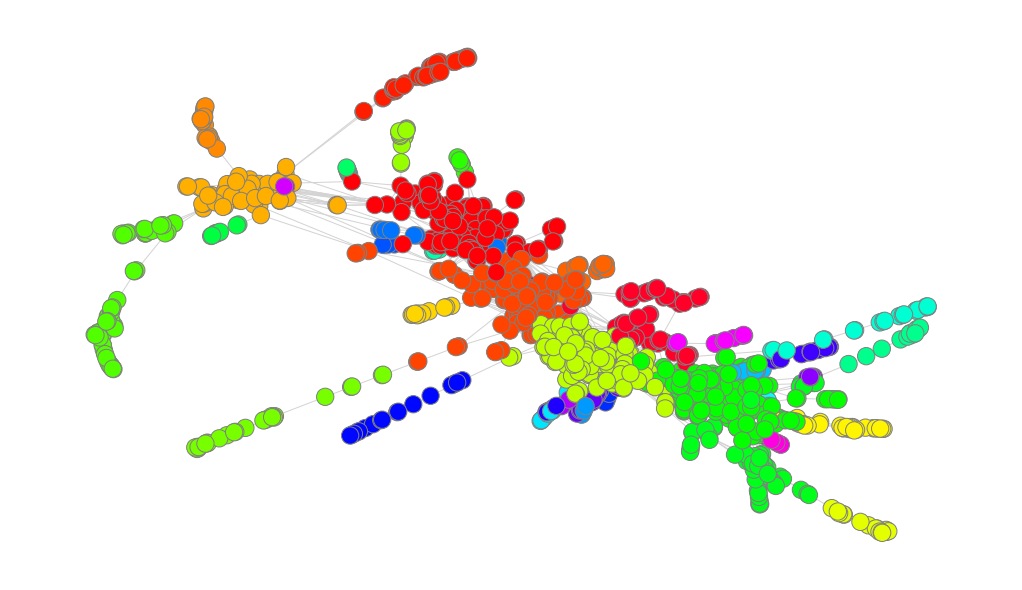

In [117]:
plt.figure(figsize=(14,8))
nx.draw(prox_graph,
        pos=pos2,
        #node_size=tamanio_node_sm_r.nodesize,
        node_color=nodedf.color,
        edge_color='lightgrey',
        edgecolors='grey')

### A continuación se presenta un plot de todo el espacio de producto de Uruguay con RCA > 1. 

In [106]:
df_ury = df_ec2_tmp[(df_ec2_tmp.country_name == "Uruguay") & (df_ec2_tmp.year==2019)& (df_ec2_tmp.Mcp>0)][['product_code','Mcp']]
df_ury.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 7075100 to 7076299
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  116 non-null    object
 1   Mcp           116 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.7+ KB


In [112]:
ury_color = nodedf.color.where(
    nodedf.hs_product_code.isin(df_ury.product_code),
    'lightgrey'
    )

<Figure size 1008x576 with 0 Axes>

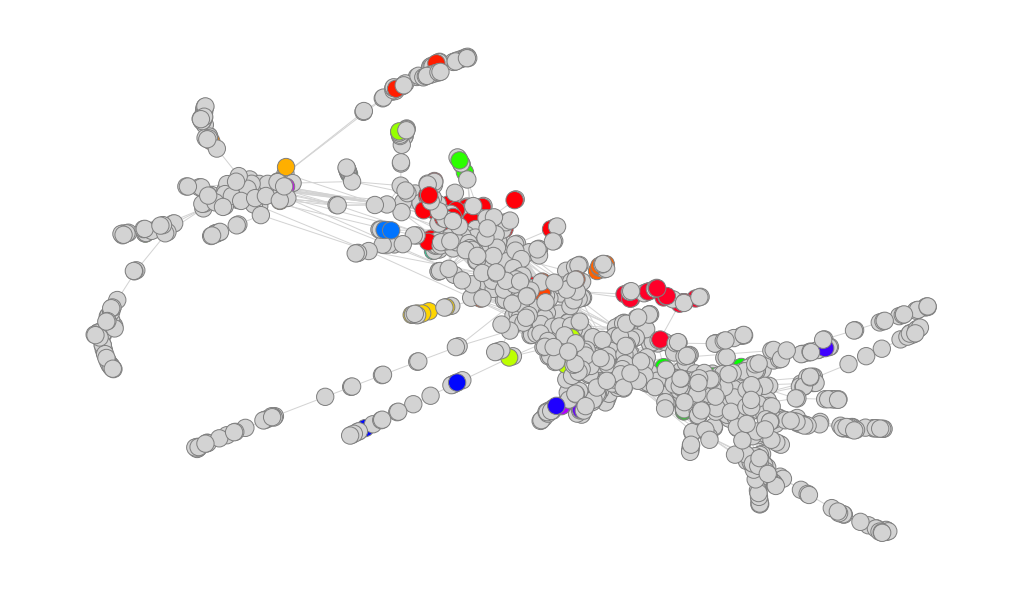

In [114]:
plt.figure(figsize=(14,8))
nx.draw(prox_graph,
        pos=pos2,
        #node_size=tamanio_node_sm_r.nodesize,
        node_color=ury_color,
        edge_color='lightgrey',
        edgecolors='grey')

###Hidalgo y Hausmann (2009) calcularon la complejidad por países $c$ como el promedio de PCI para todos los productos  cuando ${RCA}_{cp}>1$.

###Por lo tanto, se puede definir un PCI promedio ponderado, donde las ponderaciones vienen dadas por el valor de las exportaciones del país  $c$ en cada producto. Esto nos permitirá definir una ECI independiente para cada mercado de exportación.

### Tomando como referencia el artículo de Frank Neffke y  Ernesto Lopez-Cordova, para el caso de Ucrania (doc abajo), haremos el cálculo de ECI de cada mercado que exporta Uruguay.

[https://growthlab.cid.harvard.edu/publications/assessing-ukraines-role-european-value-chains-gravity-equation-cum-economic](https://growthlab.cid.harvard.edu/publications/assessing-ukraines-role-european-value-chains-gravity-equation-cum-economic)

###Donde $\mathcal{M}$ es el conjunto de países donde todos constituyes un mercado de exportación (Ej, EU&rsquo;s un simple mercado). Se puede expresar el mercado-destino con un ECI específico por país como:

\begin{equation}
ECI_{c}^{\mathcal{M}}=\sum \limits_{p} \frac{\sum \limits_{d \in \mathcal{M}} X^{d}_{op}}{\sum \limits_{d \in \mathcal{M}} X^{d}_{o}} {PCI}_{p}   
\end{equation}


Donde $X_{op}^{d}$ representa el producto de exportación $p$ desde un exportador (location_country) $o$ hacia un importador $d$ y considerando un subíndice omitido como: $X_{o}^{d}=\sum \limits_{p} X_{op}^{d}$.


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")

print(f'cargando data (desde drive)')

## Se importa 
df_uy_exp = pd.read_csv("/content/drive/MyDrive/eci/base/hs_partner/uy_exports_per_destination.csv")

print('Loaded')

# Muestro el dataframe
df_uy_exp.tail()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cargando data (desde drive)
Loaded


,location_id,partner_id,product_id,year,export_value,import_value,hs_eci,hs_coi,location_code,partner_code,hs_product_code
36173,230,28,660,2019,49359,0,-0.02,-0.43,URY,BLR,205
36174,230,115,660,2019,1898971,0,-0.02,-0.43,URY,KAZ,205
36175,230,186,660,2019,3029303,0,-0.02,-0.43,URY,RUS,205
36176,230,239,660,2019,575020,0,-0.02,-0.43,URY,VNM,205
36177,230,8,845,2019,34469,0,-0.02,-0.43,URY,ARG,2307


Se hace un merge de los PCI de los productos en un determinado año en el data frame (utilizando df<sub>ec</sub> ). 

In [ ]:
# Arreglo la base, colocando leading zeros en la col Hs_product_code
df_uy_exp.loc[ (df_uy_exp['hs_product_code'].astype(str).str.len()==3), 'hs_product_code']= '0'+ df_uy_exp['hs_product_code'].astype(str)
df_uy_exp['hs_product_code'] = df_uy_exp['hs_product_code'].astype(str).str.strip()
# -- juego con los PCIs del 2014
df_pci = df_ec[df_ec['year']==2018][['product_code','pci']].drop_duplicates(subset='product_code')
# -- hago un merge de los PCis en la base
df_uy_exp = pd.merge(df_uy_exp,df_pci[['product_code','pci']],how='left',left_on=f'hs_product_code',right_on=f'product_code',indicator=True)
df_uy_exp['_merge'].value_counts()

both          36178
right_only        0
left_only         0
Name: _merge, dtype: int64

In [ ]:
def calc_ecimc(data,origin_col,destination_col,product_col,value_col,pci_col):
    """
    Calcula ECI por destino
  
    """
    dft = data.copy()
    dft['export_value_cot'] = dft.groupby([origin_col,destination_col])[value_col].transform('sum')
    dft['pci_x_export'] = dft[pci_col] * dft[value_col]
    dft['pci_x_export_sum'] = dft.groupby([origin_col,destination_col])['pci_x_export'].transform('sum')
    dft['eciMc'] = dft['pci_x_export_sum']/dft['export_value_cot']
    dft.drop_duplicates(subset=[origin_col,destination_col],inplace=True)
    dft = dft[[origin_col,destination_col,'eciMc']]

    return dft

df_uy_ecimc = calc_ecimc(data=df_uy_exp,
                          origin_col='location_code',
                          destination_col= 'partner_code',
                          product_col='hs_product_code',
                          value_col='export_value',
                          pci_col = 'pci'
                        )

#muestra del frame
df_uy_ecimc.sample(n=15)
#Muestra ordenada según el valor de ECIMc
#df_uy_ecimc.sort_values(by='eciMc', ascending=False, na_position='first')

,location_code,partner_code,eciMc
291,URY,EGY,-0.81
354,URY,LVA,2.33
41,URY,RUS,-0.23
23,URY,NOR,-1.29
157,URY,SEN,-2.25
746,URY,HND,1.07
172,URY,BRB,-1.11
108,URY,VEN,-0.24
12652,URY,MLI,-0.39
19,URY,KOR,0.21


(0.0, 1.0, 0.0, 1.0)

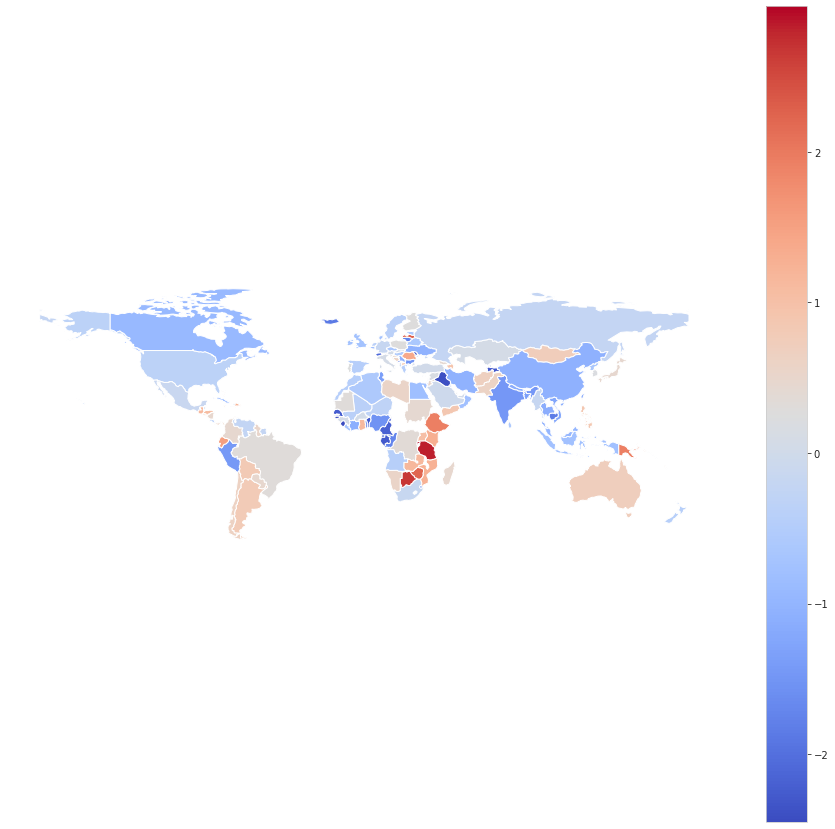

In [ ]:
# https://matplotlib.org/stable/tutorials/colors/colormapnorms.html
path = geopandas.datasets.get_path('naturalearth_lowres')
geo_world = geopandas.read_file(path)
# merge de complejidades
geo_world = pd.merge(geo_world,df_uy_ecimc[df_uy_ecimc['eciMc']<3],how='left',left_on=f'iso_a3',right_on='partner_code',indicator=True)
fig, ax = plt.subplots(1, 1,figsize=(16,15))
plt.axis('off')

cmap = cm.coolwarm
geo_world.plot(column='eciMc', ax=ax, legend=True,cmap=cmap)
plt.show()

In [ ]:
## Para el 2014
#df_uy_ecimc[df_uy_ecimc['eciMc']>0].count() ## --> Uruguay exporta a 77 países con un ECI >0
df_uy_ecimc[df_uy_ecimc['eciMc']<=0].count() #--> Uruguay exporta a 95 países con un ECI <=0

location_code    100
partner_code     100
eciMc            100
dtype: int64

In [ ]:
df_uy_ecimc.sort_values(by='eciMc', ascending=False, na_position='first').head()

,location_code,partner_code,eciMc
15537,URY,RWA,2.97
3041,URY,TZA,2.82
86,URY,AND,2.80
13459,URY,BWA,2.67
354,URY,LVA,2.33


##**Análisis Predictivo ECI**

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


In [ ]:
df_tmp = df_uy_ecimc.copy()
#country=LabelEncoder()
df_tmp.head()

,location_code,partner_code,eciMc
0,URY,ARE,0.01
1,URY,ARG,0.80
2,URY,BEL,-0.81
3,URY,BRA,0.30
4,URY,CAN,-0.91


In [ ]:
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(df_tmp[['partner_code']])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
df_tmp["year"]=2018 

In [ ]:
df_tmp.head()

,location_code,partner_code,eciMc,year
0,URY,ARE,0.01,2018
1,URY,ARG,0.80,2018
2,URY,BEL,-0.81,2018
3,URY,BRA,0.30,2018
4,URY,CAN,-0.91,2018
